In [171]:
import pandas as pd
import seaborn as sns
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Импортируем файлы

## Файл train

In [2]:
train = pd.read_csv('Data/train.csv') # импортируем файл

Датафрейм содержит 101230332 строк, 9 столбцов. Одие столбец с типом float, один — object, восемь — int.

Чтобы далее комфортнее работать с данными в рамках учебного задания, возьмем из датафрейма 200 000 строк.

In [3]:
train = train.head(200000) # сохраняем в DF 200 000 строк для дальнейшей обработки

### Описание столбцов

- row_id: (int64) — ID строки.
- timestamp: (int64) — Время в милисекундах между началом сессии и завершением.
- user_id: (int32) — ID пользователя.
- content_id: (int16) — ID вопроса.
- content_type_id: (int8) — 0 — вопрос; 1 — просмотр лекции.
- task_container_id: (int16) — ID блока вопросов или лекции (может включать в себя несколько content_id).
- user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций.
- answered_correctly: (int8) — ответ пользователя на вопрос, -1 - пустое значение для лекций.
- prior_question_elapsed_time: (float32) — среднее время в милисекундах, затраченное пользователем на ответы на предыдущий блок вопросов. Для первого значения — 0.
- prior_question_had_explanation: (bool)— видел ли пользователь правильный ответ и объяснение на предыдущий блок вопросов (лекции в промежутке игнорируются). Для первого значения — 0. Обычно первые вопросы, которые видит пользователь - тест, на который не дается обратная связь.

## Файл questions

МЕТАДАННЫЕ ДЛЯ ВОПРОСОВ, ЗАДАВАЕМЫХ ПОЛЬЗОВАТЕЛЯМ

In [4]:
questions = pd.read_csv('Data/questions.csv') # импортируем файл

### Описание столбцов

- question_id: внешний ключ для столбца train/test content_id, когда тип содержимого - вопрос (0).
- bundle_id: код, для которого вопросы подаются вместе.
- correct_answer: ответ на этот вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.
- part: соответствующий раздел теста TOEIC.
- tags: один или несколько подробных кодов тегов для вопроса. Значение тегов предоставлено не будет, но этих кодов достаточно для объединения вопросов воедино.

## Файл lectures

МЕТАДАННЫЕ ДЛЯ ЛЕКЦИЙ, КОТОРЫЕ ПРОСМАТРИВАЮТ ПОЛЬЗОВАТЕЛИ ПО МЕРЕ ПРОДВИЖЕНИЯ В СВОЕМ ОБРАЗОВАНИИ

In [5]:
lectures = pd.read_csv('Data/lectures.csv') # импортируем файл

### Описание столбцов

- lecture_id: внешний ключ для столбца train/test content_id, когда тип содержимого - лекция (1).
- part: код категории верхнего уровня для лекции.
- tag: один тег кодирует лекцию. Значение тегов не будет предоставлено, но этих кодов достаточно для объединения лекций воедино.
- type_of: краткое описание основной цели лекции.

# Проверим достоверность и полноту данных

## Файл train

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          200000 non-null  int64  
 1   timestamp                       200000 non-null  int64  
 2   user_id                         200000 non-null  int64  
 3   content_id                      200000 non-null  int64  
 4   content_type_id                 200000 non-null  int64  
 5   task_container_id               200000 non-null  int64  
 6   user_answer                     200000 non-null  int64  
 7   answered_correctly              200000 non-null  int64  
 8   prior_question_elapsed_time     195566 non-null  float64
 9   prior_question_had_explanation  199282 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 15.3+ MB


In [7]:
train['timestamp'].isna().value_counts() # этот столбец заполнен без пропусков
train['user_id'].isna().value_counts() # этот столбец заполнен без пропусков
train['content_id'].isna().value_counts() # этот столбец заполнен без пропусков
train['content_type_id'].isna().value_counts() # этот столбец заполнен без пропусков
train['user_answer'].isna().value_counts() # этот столбец заполнен без пропусков
train['answered_correctly'].isna().value_counts() # этот столбец заполнен без пропусков

False    200000
Name: answered_correctly, dtype: int64

In [8]:
train['prior_question_elapsed_time'].isna().value_counts() # этот столбец имеет 4434 незаполненных значений

False    195566
True       4434
Name: prior_question_elapsed_time, dtype: int64

In [9]:
train['prior_question_had_explanation'].isna().value_counts() # этот столбец имеет 718 незаполненных значений

False    199282
True        718
Name: prior_question_had_explanation, dtype: int64

## Файл questions

In [10]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [11]:
questions['question_id'].isna().value_counts() # этот столбец заполнен без пропусков
questions['bundle_id'].isna().value_counts() # этот столбец заполнен без пропусков
questions['correct_answer'].isna().value_counts() # этот столбец заполнен без пропусков
questions['part'].isna().value_counts() # этот столбец заполнен без пропусков

False    13523
Name: part, dtype: int64

In [12]:
questions['tags'].isna().value_counts() # этот столбец имеет 1 пропуск

False    13522
True         1
Name: tags, dtype: int64

In [13]:
questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


## Файл lectures

In [14]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [247]:
questions['lecture_id'].isna().value_counts() # этот столбец заполнен без пропусков
questions['tag'].isna().value_counts() # этот столбец заполнен без пропусков
questions['part'].isna().value_counts() # этот столбец заполнен без пропусков
questions['type_of'].isna().value_counts() # этот столбец заполнен без пропусков

# Постановка задачи исследования

На основе предоставленных данных можно провести следующие исследования:
- по какому количеству студентов есть данные в датафрейме
- сколько в средем времени тратит студент на иузчение материалов
- есть ли зависимосимость между тем, сколько тратится времени на подготовку и тем, насколько хорошо отвечают пользователи, а также насколько высокую оценку получают
- есть ли зависимость между затраченным временем на подготовку и тем, насколько быстро пользователи отвечают на вопросы
   

# Подготовка данных

## Файл train

In [16]:
train_copy = train.copy() # создаем копию датафрейма, чтобы дальше вносить изменения только в копию

In [17]:
train_copy = train_copy.drop(['row_id'], axis=1) # Удалим строку row_id, так как она дублирует метки.

In [18]:
students_success = train_copy[['timestamp',
                               'user_id','content_id','answered_correctly',
                               'prior_question_elapsed_time']]

# cоберем отдельный датафрейм students_success, по которому будем изучать зависимость

In [19]:
students_success

,timestamp,user_id,content_id,answered_correctly,prior_question_elapsed_time
0,0,115,5692,1,NaN
1,56943,115,5716,1,37000.0
2,118363,115,128,1,55000.0
3,131167,115,7860,1,19000.0
4,137965,115,7922,1,11000.0
...,...,...,...,...,...
199995,161267737,4022163,9059,1,15000.0
199996,161381846,4022163,4058,1,37000.0
199997,161452468,4022163,8722,0,28000.0
199998,161548577,4022163,3926,0,25000.0


# 1. Исследуем датафрейм train

In [20]:
# Всего студентов в датафрейме для исследования — 716

students_success.user_id.nunique()

719

In [253]:
points = students_success.groupby('user_id').agg({'answered_correctly': 'sum'}) \
.sort_values('answered_correctly', ascending=False) # баллы, которые набрали студенты

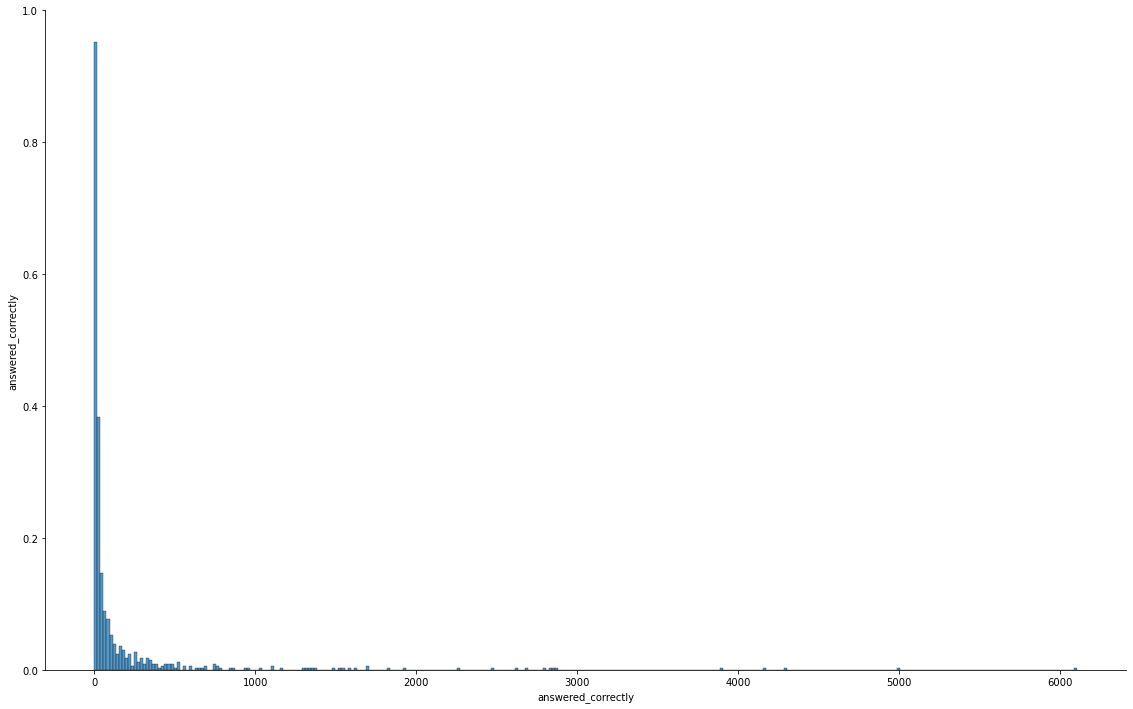

In [31]:
sns.pairplot(data=points,height=10, aspect=1.6) 
# на графике видим, что распределение данных очень сильно смещено влево
# это значит, что можно выделить группы студентов по успеваемости по квартилям

In [127]:
students_success.query('user_id==1283420').prior_question_elapsed_time.sum()

199115872.0

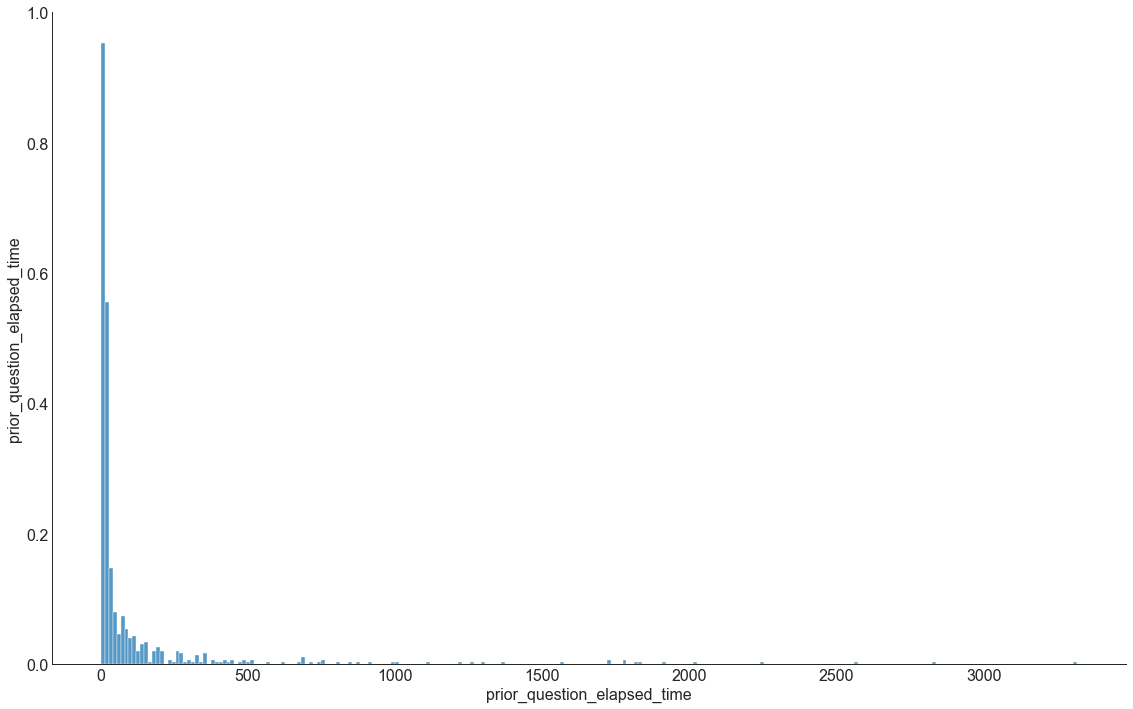

In [168]:
sns.pairplot(data=time_spend,height=10, aspect=1.6) # распределение студентов 

<AxesSubplot:xlabel='answered_correctly', ylabel='prior_question_elapsed_time'>

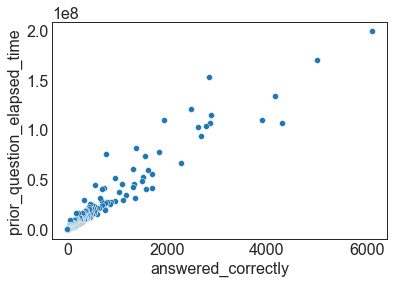

In [245]:
view = points.merge(time_spend, how='inner')
sns.scatterplot(data=view, x="answered_correctly", y="prior_question_elapsed_time")

# cтроим график зависимости затрат времени на подготовку и количество полученных баллов
# как видим по графику, коэфф. корреляции близкий к 1

In [211]:
time_spend = students_success.groupby('user_id').agg({'prior_question_elapsed_time': 'sum'}) \
.sort_values('prior_question_elapsed_time', ascending=False)
# время, которое студенты потратили на подготовку в миллисекундах

In [205]:
def time_to_days (args):
    return args / 60000

In [267]:
time_spend['prior_question_elapsed_time'] = time_spend['prior_question_elapsed_time'].apply(time_to_days) 
# переводим миллисекунды в минуты

In [255]:
points['user'] = points.index
time_spend['user'] = time_spend.index

In [262]:
points['user'] = points['user'].astype('object')
time_spend['user'] = time_spend['user'].astype('object')

In [264]:
points.describe()

,answered_correctly
count,719.000000
mean,179.881780
std,536.473966
min,0.000000
25%,12.000000
50%,25.000000
75%,97.000000
max,6103.000000


In [269]:
time_spend.describe()

,prior_question_elapsed_time
count,719.000000
mean,114.720339
std,324.272697
min,0.000000
25%,9.525000
50%,16.883333
75%,69.391667
max,3318.597867


In [36]:
points_group_4 = points.query('answered_correctly <= 12') # 204 студента с успеваемостью в первом квартиле
points_group_3 = points.query('12 < answered_correctly <= 25') # 163 студента с успеваемостью в первом квартиле
points_group_2 = points.query('25 < answered_correctly <= 97') # 174 студента с успеваемостью в первом квартиле
points_group_1 = points.query('answered_correctly > 97') # 178 студента с успеваемостью в первом квартиле

# далее исследуем первую и четвертые группы, чтобы понял, 
# почему в первом квартиле у студентов такие высокие показатели успеваемости

In [270]:
time_spend_group_4 = time_spend.query('prior_question_elapsed_time <= 9.5') # 180 студентов с затратами времени на подготовку в первом квартиле
time_spend_group_3 = time_spend.query('9.5 < prior_question_elapsed_time <= 16.8') # 178 студентов с затратами времени на подготовку в первом квартиле
time_spend_group_2 = time_spend.query('16.8 < prior_question_elapsed_time <= 69.3') # 180 студентов с затратами времени на подготовку в первом квартиле
time_spend_group_1 = time_spend.query('prior_question_elapsed_time > 69.3') # 181 студент с затратами времени на подготовку в первом квартиле

<AxesSubplot:xlabel='answered_correctly', ylabel='prior_question_elapsed_time'>

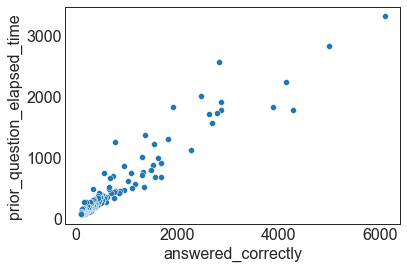

In [285]:
view_group_1 = points_group_1.merge(time_spend_group_1)
sns.scatterplot(data=view_group_1, x="answered_correctly", y="prior_question_elapsed_time")

# перепроверка корреляции на основе группы студентов 1

Основыне выводы:
- среди оценок и времени подготовки студентов очень большой разброс
- для выделения отдельных групп использовал группировку по квартилям
- есть прямая зависимость между затраченным временем на подготовку и успегностью сдачи экзаменов
- можно сделать предположение, что программа подготовки отвечает требованиям подготовки к экзаменам

# 2. Исследуем датафрейм lectures

In [287]:
lectures.lecture_id.nunique()

# всего доступно 418 лекций

418

In [289]:
lectures['part'].value_counts(normalize=True)
lectures['type_of'].value_counts(normalize=True)
lectures['tag'].value_counts().head()

136    7
27     6
161    6
74     6
134    6
Name: tag, dtype: int64

In [290]:
l_list = list(train[train['content_type_id'] == 1]['content_id'].unique())
len(l_list)
l_quant = []
for l in l_list:
    tmp_l = train[(train['content_id'] == l)]['content_id'].count()
    l_quant.append(tmp_l)

l_ex = pd.DataFrame({'lecture_id': l_list,'l_quant': l_quant})
l_ex = l_ex.astype({'lecture_id': 'int16', 'l_quant': 'int32'})
lectures = pd.merge(lectures, l_ex, how='inner')
display(lectures)

,lecture_id,tag,part,type_of,l_quant
0,89,159,5,concept,48
1,100,70,1,concept,34
2,192,79,5,solving question,25
3,317,156,5,solving question,15
4,335,114,2,concept,121
...,...,...,...,...,...
338,32491,179,5,solving question,5
339,32535,8,5,solving question,9
340,32570,113,3,solving question,8
341,32625,142,2,concept,16


In [291]:
lectures.groupby('tag').sum()['l_quant'].sort_values(ascending=False).head()

# группировка лекций по популярности и тегам

tag
39     262
161    173
62     163
27     159
114    146
Name: l_quant, dtype: int32

Основыне выводы:

- Лекции разделены по темам на 7 разделов, больше всего лекций в 5 разделе.
- Леции бывают 4 типов: вступление, целеполагание, концептуальное изложение материала и решение задач.
- Большинство лекций посвящены теории, немного меньше - решению задач. Доля остальных несущественна.
- Лекции 6 и 1 связаны с теорией, 3 и 4 - практические задания.

# 3. Исследуем датафрейм questions

In [295]:
questions['question_id'].nunique()

# Всего в списке 13523 уникальных вопросов

13523

In [297]:
questions.tags.value_counts()

# В списке 1519 вариантов комбинации вопросов по тегам

8                 738
73                617
53                523
1                 413
96                373
                 ... 
157 144 81          1
157 144 38          1
106 169 162 81      1
157 169 162 81      1
157 169 92          1
Name: tags, Length: 1519, dtype: int64

In [298]:
questions['question_id'].groupby(questions['bundle_id']).count().max()
questions['part'].value_counts(normalize=True)
questions['tags'].describe()

# Часть вопросов объединены по bundle_id в блоки до 5 вопросов

count     13522
unique     1519
top           8
freq        738
Name: tags, dtype: object

In [302]:
df = train.loc[(train.content_type_id == 0), ['content_id', 'answered_correctly']]
q_list = list(df['content_id'].unique())
len(q_list)
quant = []
cor_quant = []
for q in q_list:
    tmp = df[df['content_id'] == q]['answered_correctly'].count()
    tmp1 = df[df['content_id'] == q]['answered_correctly'].sum()
    quant.append(tmp)
    cor_quant.append(tmp1)

q_ex = pd.DataFrame({'question_id': q_list,'quant': quant,'cor_quant': cor_quant})
q_ex = q_ex.astype({'question_id': 'int16', 'quant': 'int32', 'cor_quant': 'int32'})

questions = questions.drop('correct_answer', axis=1)
questions = pd.merge(questions, q_ex, how='inner')
questions['correct_percent'] = questions['cor_quant'] / questions['quant']
questions.describe()

,question_id,bundle_id,part,q_quant,correct_quant,correct_percent,quant,cor_quant
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000
mean,6526.108619,6525.631372,4.327947,15.780994,10.697138,0.726369,15.780994,10.697138
std,3780.433493,3780.398476,1.619991,22.340378,13.009018,0.244190,22.340378,13.009018
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3269.250000,3267.750000,3.000000,5.000000,3.000000,0.583333,5.000000,3.000000
50%,6523.500000,6521.000000,5.000000,10.000000,7.000000,0.750000,10.000000,7.000000
75%,9748.750000,9748.750000,5.000000,19.000000,14.000000,0.933333,19.000000,14.000000
max,13522.000000,13522.000000,7.000000,379.000000,268.000000,1.000000,379.000000,268.000000


Основыне выводы:
- Всего в списке 13523 уникальных вопросов.
- В списке 1519 вариантов комбинации вопросов по тегам.
- Часть вопросов объединены по bundle_id в блоки до 5 вопросов.
- Пятый раздел включает наибольшее число материалов.